In [ ]:

import kagglehub
tarkkaanko_amazon_path = kagglehub.dataset_download('tarkkaanko/amazon')

print('Data source import complete.')


100%|██████████| 582k/582k [00:00<00:00, 32.9MB/s]

Extracting files...
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
path = "/content/amazon_reviews.csv.zip"

In [ ]:
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


#### We can convert the ratings of the given products into their respective sentiments with some common maths. (4-5) : positive | (3) : neutral | (1-2) : negative

In [ ]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [ ]:
df['overall'] = df["overall"].apply(sentiment)

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,Positive,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,Positive,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,Positive,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,Positive,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,Positive,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


<Axes: xlabel='overall'>

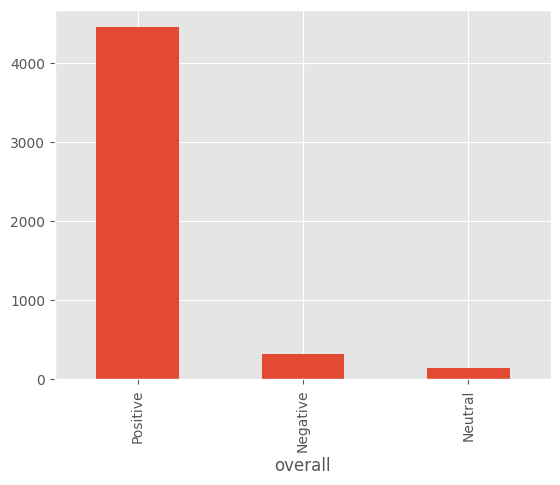

In [ ]:
df.overall.value_counts().plot(kind = "bar")

In [ ]:
df["reviewText"] = df["reviewText"].astype(str)
def toLower(text):
    return text.lower()

df["reviewText"] = df["reviewText"].apply(toLower)

In [ ]:
def data_preprocessing(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
df.reviewText.head(10)

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
5,it's mini storage. it doesn't do anything els...
6,i have it in my phone and it never skips a bea...
7,it's hard to believe how affordable digital ha...
8,works in a htc rezound. was running short of ...
9,"in my galaxy s4, super fast card, and am total..."


In [ ]:
stemmer = PorterStemmer()
def data_preprocessing_stem(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_text]
    return " ".join(stem_words)

In [ ]:
df.reviewText.head(10)

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
5,it's mini storage. it doesn't do anything els...
6,i have it in my phone and it never skips a bea...
7,it's hard to believe how affordable digital ha...
8,works in a htc rezound. was running short of ...
9,"in my galaxy s4, super fast card, and am total..."


In [ ]:


df = df.drop_duplicates('reviewText')

In [ ]:
df.reviewText.head(10)

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
5,it's mini storage. it doesn't do anything els...
6,i have it in my phone and it never skips a bea...
7,it's hard to believe how affordable digital ha...
8,works in a htc rezound. was running short of ...
9,"in my galaxy s4, super fast card, and am total..."


In [ ]:
print(df['reviewText'].iloc[0],'\n')
print(df['reviewText'].iloc[1],'\n')
print(df['reviewText'].iloc[2],'\n')

no issues. 

purchased this for my device, it worked as advertised. you can never have too much phone memory, since i download a lot of stuff this was a no brainer for me. 

it works as expected. i should have sprung for the higher capacity.  i think its made a bit cheesier than the earlier versions; the paint looks not as clean as before 



Text(0.5, 1.0, 'Distribution of sentiments')

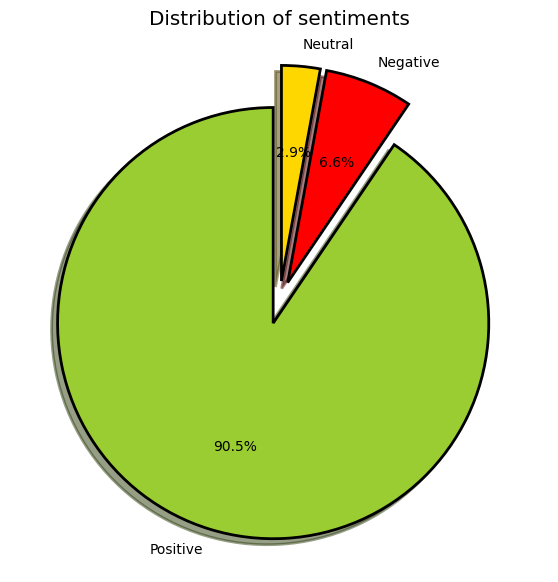

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen','red','gold')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['overall'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_comments = df[df.overall == 'Positive']
pos_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,Positive,no issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,Positive,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,Positive,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,Positive,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,Positive,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


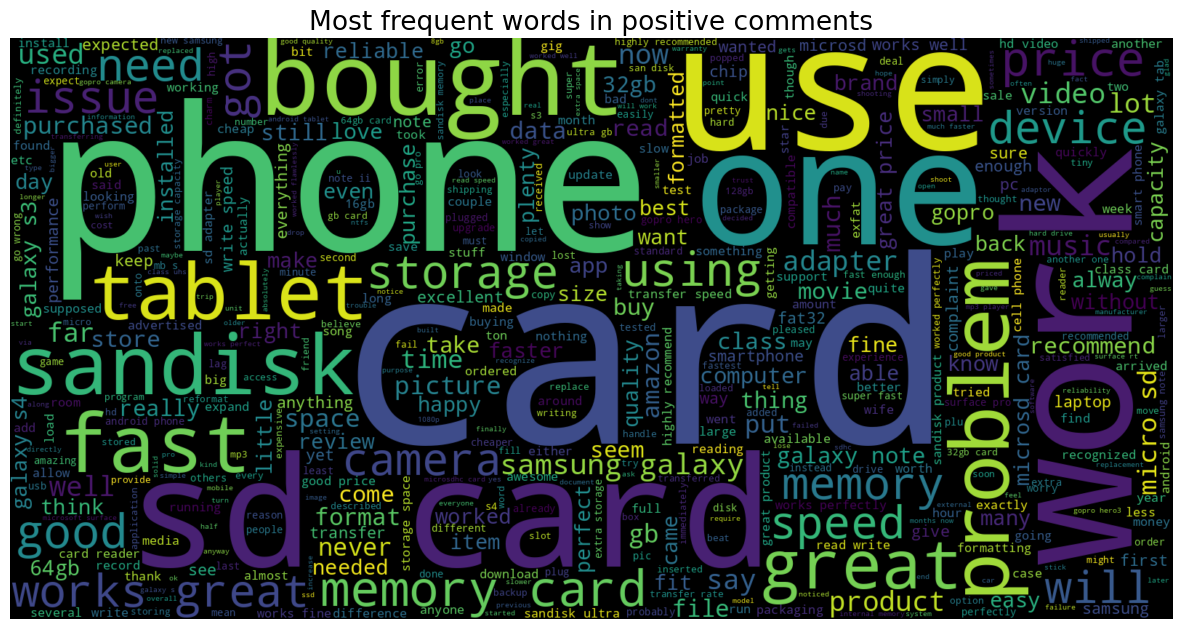

In [ ]:
text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [ ]:
neg_comments = df[df.overall == 'Negative']
neg_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
32,32,"Abdulrahman J. Alrashed ""dr34m3r""",Negative,"i bought 2 of those sandisk 32 gb microsd , us...",2013-03-08,640,0,0,0,0,0.0,0.0
38,38,Abraham Arturo Meza Marin,Negative,i bougth this micro sd card after some trubles...,2013-02-19,657,0,0,0,0,0.0,0.0
43,43,"Abused Commuter ""abused_commuter""",Negative,ordered this for a galaxy s3. lasted a few mo...,2013-07-20,506,0,1,1,-1,0.0,0.0
49,49,Ace of Sevens,Negative,"i used this for a few months in my phone, then...",2014-01-31,311,0,0,0,0,0.0,0.0
108,108,Alan,Negative,it works but the actual r/w speeds are 18/8 mb...,2014-03-25,258,0,0,0,0,0.0,0.0


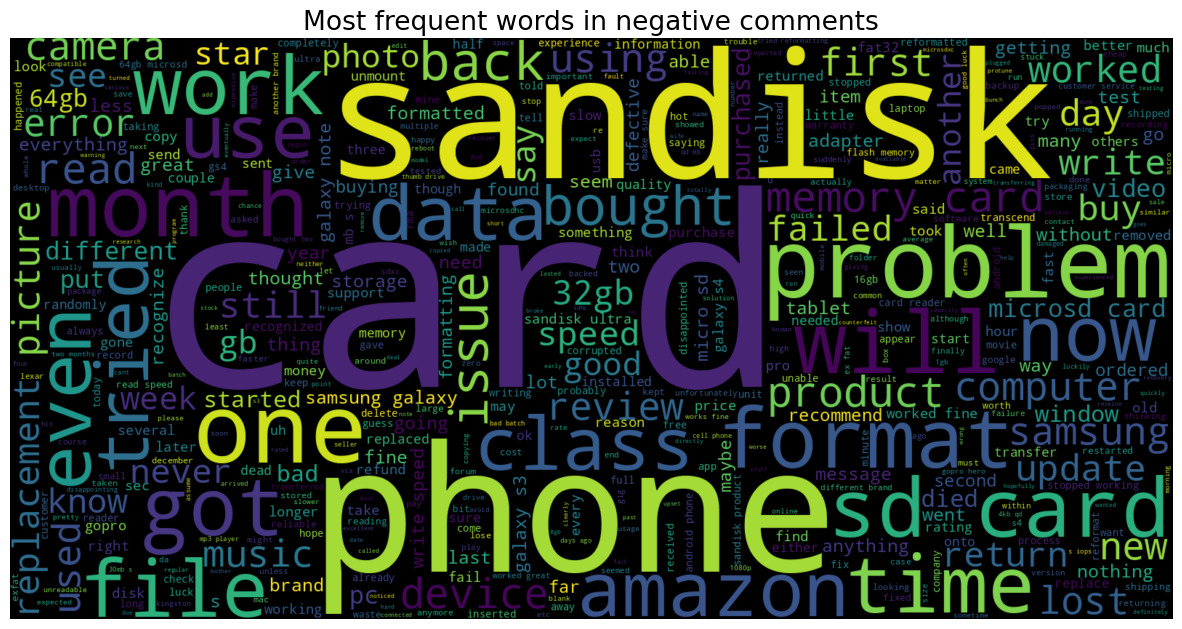

In [ ]:
text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

In [ ]:
neu_comments = df[df.overall == 'Neutral']
neu_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
11,11,98020,Neutral,"it works, but file writes are a bit slower tha...",2013-11-20,383,0,0,0,0,0.0,0.000000
64,64,"Adam Wright ""Electrical Engineer""",Neutral,this card advertises itself as uhs1 but it's a...,2013-09-09,455,1,0,1,1,1.0,0.206549
112,112,Albert,Neutral,does it's job and fairly cheap for what it's w...,2014-04-05,247,0,0,0,0,0.0,0.000000
122,122,Alejandro Hernndez,Neutral,still don't feel is very fast or is just my ph...,2014-03-02,281,0,0,0,0,0.0,0.000000
163,163,Alton L Spencer,Neutral,worked great in my galaxy s4--until it didn't ...,2014-05-27,195,0,0,0,0,0.0,0.000000


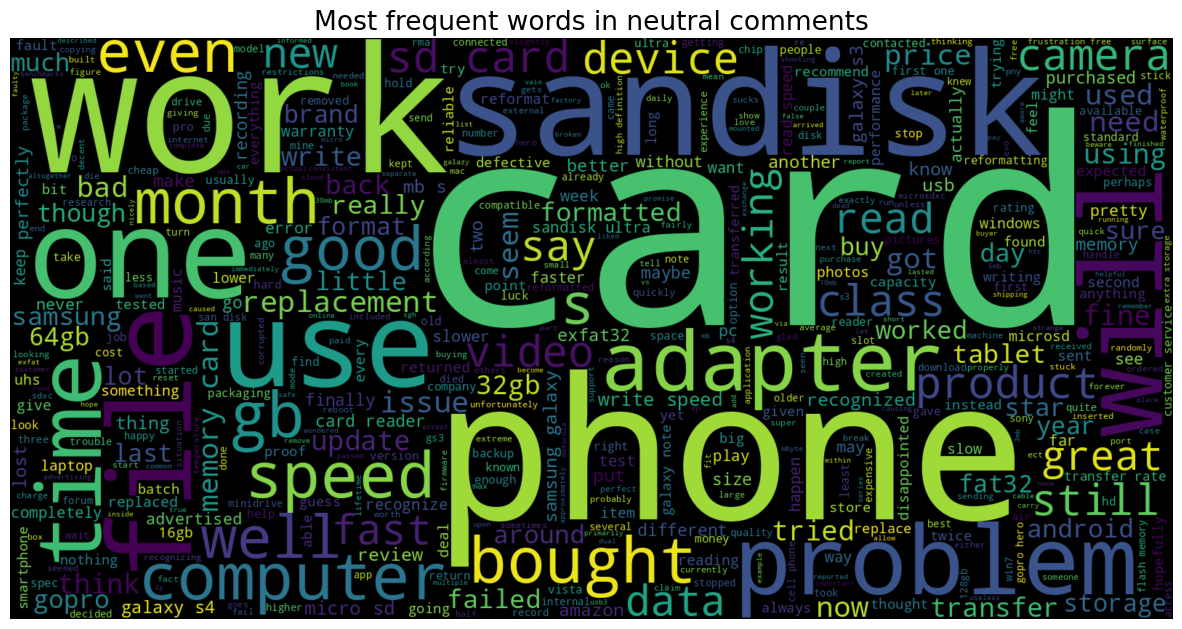

In [ ]:
text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['reviewText'])

In [ ]:
X = df['reviewText']
Y = df['overall']
X = vect.transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [ ]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3930, 87173)
Size of y_train: (3930,)
Size of x_test: (983, 87173)
Size of y_test: (983,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 93.08%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 32   2  30]
 [  4   0  24]
 [  4   4 883]]


              precision    recall  f1-score   support

    Negative       0.80      0.50      0.62        64
     Neutral       0.00      0.00      0.00        28
    Positive       0.94      0.99      0.97       891

    accuracy                           0.93       983
   macro avg       0.58      0.50      0.53       983
weighted avg       0.91      0.93      0.92       983



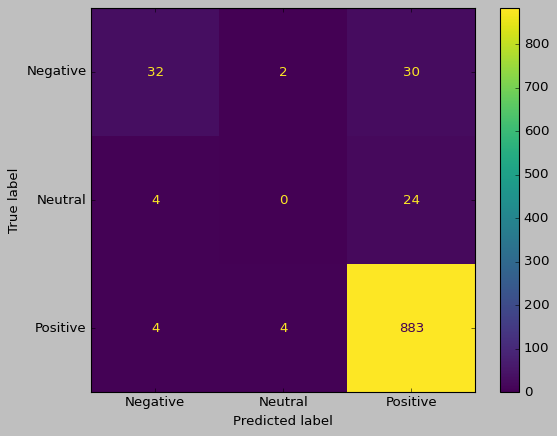

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 93.29%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[ 34   3  27]
 [  5   0  23]
 [  5   3 883]]


              precision    recall  f1-score   support

    Negative       0.77      0.53      0.63        64
     Neutral       0.00      0.00      0.00        28
    Positive       0.95      0.99      0.97       891

    accuracy                           0.93       983
   macro avg       0.57      0.51      0.53       983
weighted avg       0.91      0.93      0.92       983



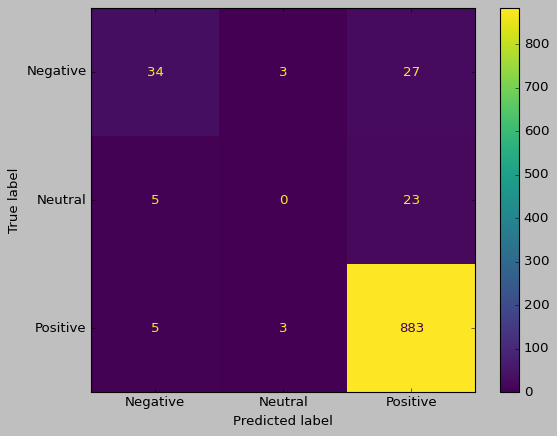

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()